# K-means

K-means es un algoritmo de clustering utilizado para agrupar un conjunto de datos en k clusters. El objetivo es minimizar la variabilidad dentro de cada cluster.

## Conceptos Clave

- **Centroides**: Puntos que representan el centro de cada cluster. Inicialmente, los centroides se eligen aleatoriamente.
- **Asignaci칩n de Clusters**: Cada punto de datos se asigna al cluster cuyo centroide est칠 m치s cercano.
- **Actualizaci칩n de Centroides**: Despu칠s de asignar todos los puntos de datos, los centroides se recalculan como la media de todos los puntos de datos en el cluster.

## Construcci칩n de K-means

1. **Inicializaci칩n**: Seleccionar k centroides iniciales, que pueden ser elegidos aleatoriamente o mediante alg칰n otro m칠todo de inicializaci칩n como k-means++.
2. **Asignaci칩n de Clusters**: Asignar cada punto de datos al centroide m치s cercano.
3. **Actualizaci칩n de Centroides**: Calcular la nueva posici칩n de cada centroide como la media de los puntos asignados a ese cluster.
4. **Iteraci칩n**: Repetir los pasos 2 y 3 hasta que los centroides ya no cambien significativamente o se alcance un n칰mero m치ximo de iteraciones.

### Suposiciones y Consideraciones

- **N칰mero de Clusters (k)**: Debe especificarse de antemano el n칰mero de clusters. La selecci칩n adecuada de k es crucial para el rendimiento del algoritmo.
- **Escalado de Caracter칤sticas**: Es importante normalizar o estandarizar los datos, ya que K-means es sensible a la escala de las caracter칤sticas.
- **Formas de los Clusters**: K-means asume que los clusters tienen forma esf칠rica y aproximadamente el mismo tama침o.

### Ventajas y Desventajas

- **Ventajas**:
  - F치cil de implementar y comprender.
  - Eficiente en t칠rminos de tiempo de computaci칩n.
  - Funciona bien con grandes conjuntos de datos.
  - R치pido para actualizar cuando se a침aden nuevos datos.

- **Desventajas**:
  - El n칰mero de clusters k debe ser especificado de antemano.
  - Sensible a la inicializaci칩n de los centroides.
  - Puede converger a un 칩ptimo local.
  - No funciona bien con clusters de formas no esf칠ricas o de tama침os muy diferentes.
  - No es adecuado para datos categ칩ricos.

### M칠tricas de Evaluaci칩n para K-means

| M칠trica                    | Qu칠 Mide                                                                 | Interpretaci칩n                                   | Cu치ndo Usarla                                             | Cu치ndo No Usarla                                           |
|----------------------------|--------------------------------------------------------------------------|--------------------------------------------------|-----------------------------------------------------------|------------------------------------------------------------|
| Inertia (Suma de Cuadrados Intra-cluster) | La suma de las distancias cuadradas desde cada punto hasta su centroide m치s cercano | Valor m치s bajo es mejor                          | Evaluar la compacidad de los clusters                     | Cuando se prefiere una m칠trica basada en la separaci칩n entre clusters |
| Silhouette Score           | Mide la separaci칩n entre los clusters y la cohesi칩n dentro de los clusters | Valor entre -1 y 1, donde 1 es perfecto          | Evaluar la calidad de los clusters                        | Cuando hay solapamiento significativo entre los clusters    |
| Davies-Bouldin Index       | Promedio de la relaci칩n de la dispersi칩n intra-cluster con la separaci칩n inter-cluster | Valor m치s bajo es mejor                          | Evaluar la separaci칩n y la compacidad de los clusters     | Cuando los clusters tienen formas no esf칠ricas              |
| Calinski-Harabasz Index    | Ratio de la suma de la dispersi칩n entre-cluster y la dispersi칩n intra-cluster | Valor m치s alto es mejor                          | Evaluar la separaci칩n y la compacidad de los clusters     | Cuando se buscan clusters de tama침os significativamente diferentes |
| Dunn Index                 | Ratio entre la m칤nima distancia entre puntos de clusters diferentes y la m치xima distancia intra-cluster | Valor m치s alto es mejor                          | Evaluar la compactaci칩n y separaci칩n de los clusters      | Cuando hay un n칰mero elevado de clusters                    |


----

# Ejercicio pr치ctico

In [5]:
import pandas as pd

df = pd.read_csv('/Users/lunaflorestorres/Desktop/Machine Learning/housing.csv')

In [6]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

<Axes: xlabel='latitude', ylabel='longitude'>

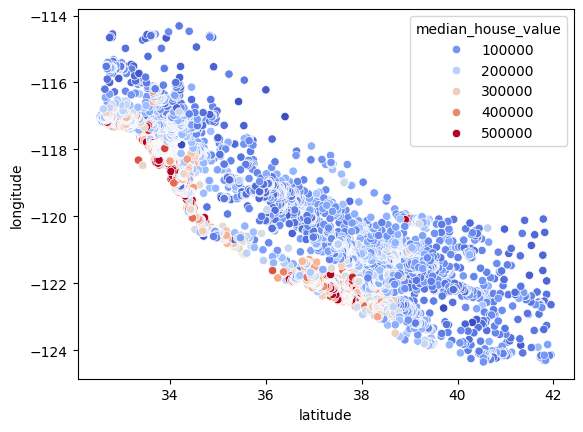

In [9]:
import seaborn as sb
sb.scatterplot(x='latitude', y ='longitude', data= df, hue='median_house_value', palette='coolwarm')

TypeError: cannot convert the series to <class 'float'>

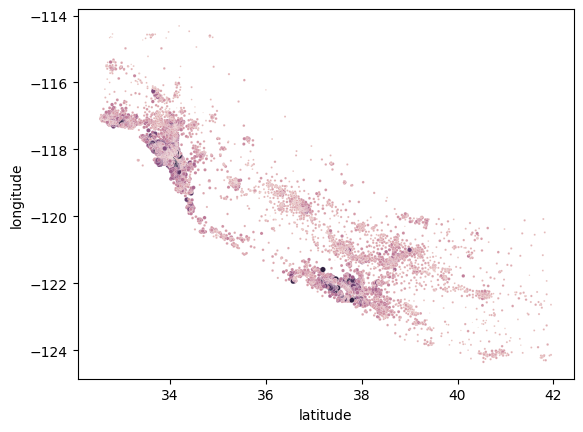

In [10]:
import seaborn as sb
sb.scatterplot(x='latitude', y ='longitude', data= df, hue='median_income',
               s=df['median_income'])

Vemos que los que ganan menos est치n muy distribuidos por toda California, pero los que ganan m치s est치n m치s concentrados en el Norte y en el Sur, siempre cerca del mar. Aunque no hay grupos de personas claramente definidas seg칰n sus ingresos, si quisieramos lanzar una campa침a de venta de casas en California, ser칤a m치s interesante hacer grupos para agrupar a estas personas por caracter칤sticas, y eso es lo que podemos hacer con el modelo de K-Means.

Para hacer eso, vamos a usar un dataset solo con latitude, longitude y la media de ingreos. Lo hacemos as칤:

In [11]:
df.loc[:,['latitude','longitude','median_income']]

latitude  longitude  median_income
0         37.88    -122.23         8.3252
1         37.86    -122.22         8.3014
2         37.85    -122.24         7.2574
3         37.85    -122.25         5.6431
4         37.85    -122.25         3.8462
...         ...        ...            ...
20635     39.48    -121.09         1.5603
20636     39.49    -121.21         2.5568
20637     39.43    -121.22         1.7000
20638     39.43    -121.32         1.8672
20639     39.37    -121.24         2.3886

[20640 rows x 3 columns]

En el algoritmo K-means, solo se utiliza el conjunto de caracter칤sticas 洧녦 y no las etiquetas 洧녧. K-means es un algoritmo de aprendizaje no supervisado cuyo objetivo es agrupar los datos en 洧녲 clusters bas치ndose 칰nicamente en las caracter칤sticas de los datos.

In [12]:
from sklearn.cluster import KMeans

In [21]:
X = df.loc[:,['latitude','longitude','median_income']]
modelo = KMeans(n_clusters=6)
predicciones = modelo.fit_predict(X)

In [22]:
predicciones.shape

(20640,)

In [23]:
X['segmento_econ칩mico'] = predicciones

In [24]:
X

latitude  longitude  median_income  segmento_econ칩mico
0         37.88    -122.23         8.3252                   5
1         37.86    -122.22         8.3014                   5
2         37.85    -122.24         7.2574                   5
3         37.85    -122.25         5.6431                   4
4         37.85    -122.25         3.8462                   4
...         ...        ...            ...                 ...
20635     39.48    -121.09         1.5603                   1
20636     39.49    -121.21         2.5568                   1
20637     39.43    -121.22         1.7000                   1
20638     39.43    -121.32         1.8672                   1
20639     39.37    -121.24         2.3886                   1

[20640 rows x 4 columns]

In [25]:
X['segmento_econ칩mico'].value_counts()

segmento_econ칩mico
0    6638
3    4602
1    4521
4    3479
2     729
5     671
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

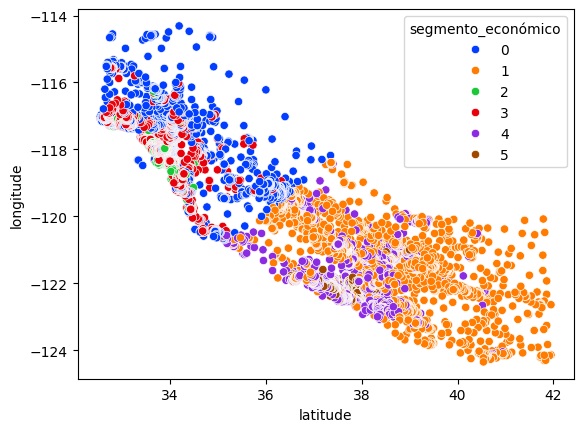

In [27]:
import seaborn as sb
sb.scatterplot(x='latitude', y ='longitude', data= X, hue='segmento_econ칩mico', palette='bright')

Para ver las cantidades de cada grupo pordemos hacer este gr치fico para verlos m치s claro:

/var/folders/pq/6k_3wzm15kld8xrgc3fg08wc0000gn/T/ipykernel_1972/361485184.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='segmento_econ칩mico',data=X, palette='bright')


<Axes: xlabel='segmento_econ칩mico', ylabel='count'>

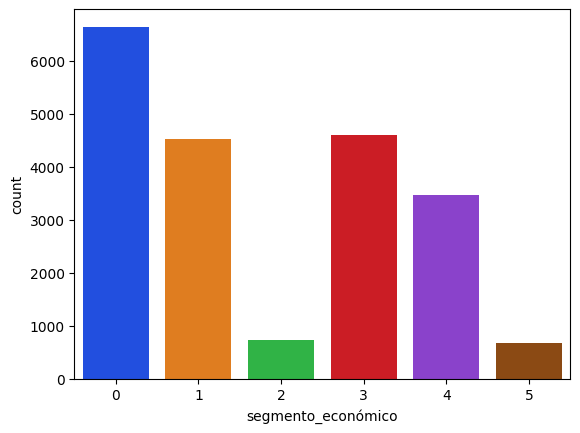

In [29]:
sb.countplot(x='segmento_econ칩mico',data=X, palette='bright')

Con esta funci칩n, agrupa cada segmento y calcula la media de los ingresos de cada uno de estos:

In [30]:
X.groupby(['segmento_econ칩mico'])['median_income'].mean()

segmento_econ칩mico
0    2.642492
1    2.509524
2    9.025869
3    4.948164
4    4.629773
5    8.265194
Name: median_income, dtype: float64

En este caso, el que m치s gana es el grupo 2 y el grupo 1 es el que menos ganan. Entonces, para lanzar una campa침a podemos lanzar a cada grupo o varios campa침as con caracter칤sticas espec칤ficas seg칰n su poder adquisitivo.